# Can smoothness alone unroll the swiss roll?
As we've seen, the KLD term in our flow embedding loss recreates the diffusion matrix admirably -- but not in the nicest way. We want an embedding in which the flow changes as little as possible: the *simplest explainable flow*. Left to its own devices, DFE seems prone to change the embedded data as little as possible -- only warping the flows to follow it. 

In higher dimensions, this may not be as problematic: the compression factor into 2 dimensions will by itself enforce substantial simplication. But with our 2d test cases, no such simplification is enforced by dimensionality. 

Can our flow embedder unroll the swiss roll? This seems a valuable test case. If it can indeed find the simplest possible flows to explain variation in the data, this is the dataset in which it should readily happen.

In [1]:
# default_exp training_utils
from nbdev.showdoc import *
import numpy as np
import torch
%load_ext autoreload
%autoreload 2
if torch.__version__[:4] == "1.13":
	# device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.has_mps else 'cpu')
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
else:
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

First, we'll set up the swiss roll dataset and find good parameters for the affinity matrix construction.

In [2]:
from directed_graphs.datasets import directed_swiss_roll_uniform
from directed_graphs.datasets import plot_directed_2d, plot_directed_3d, affinity_grid_search
from directed_graphs.diffusion_flow_embedding import DiffusionFlowEmbedder

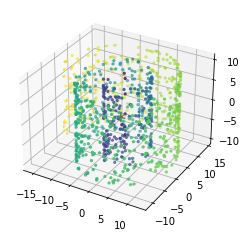

In [3]:
X, flow, labels = directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=1, height=20, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

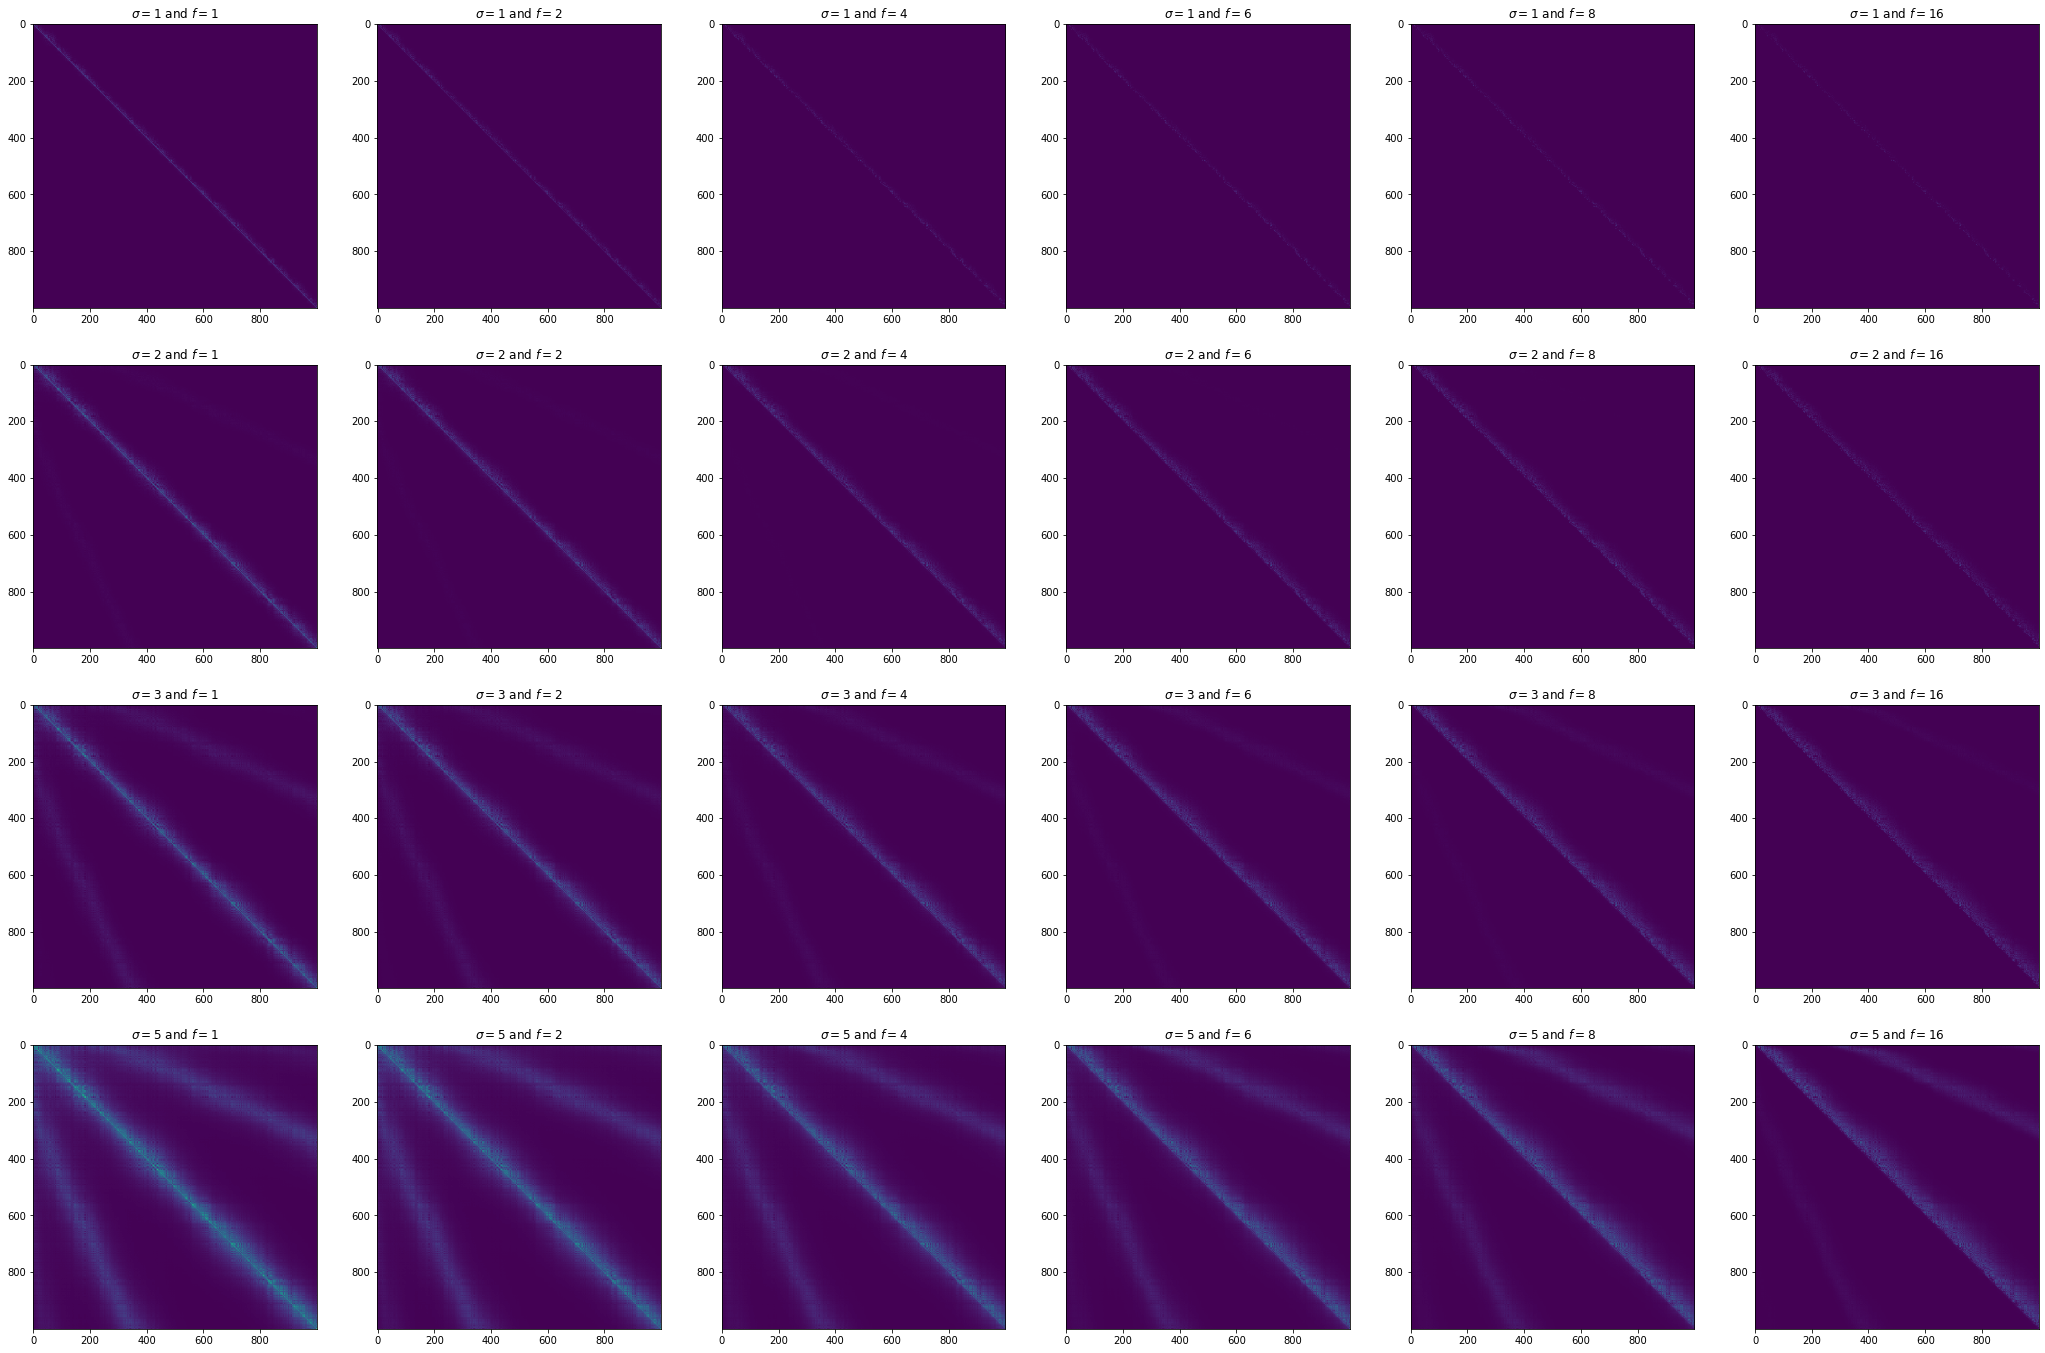

In [4]:
affinity_grid_search(X, flow, sigmas=[1,2, 3,5], flow_strengths = [1,2,4,6,8,16])

For this swiss roll, it appears $\sigma=2$ and flow_strength=4 produce the best affinity matrix.

In [5]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

  0%|          | 0/2000 [00:00<?, ?it/s]

EPOCH 0. Loss 27.861093521118164. Flow strength 3.999000072479248. Weight of flow 0.5 Heatmap of P embedding is 


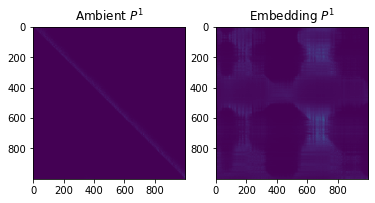

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


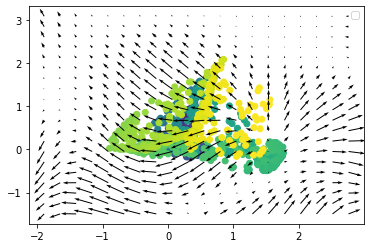

  5%|▍         | 99/2000 [00:08<02:35, 12.25it/s]

EPOCH 100. Loss 25.228670120239258. Flow strength 3.9145424365997314. Weight of flow 0.5 Heatmap of P embedding is 


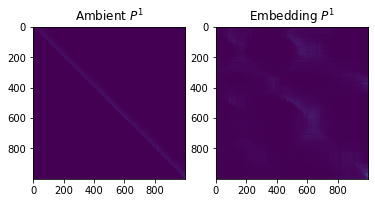

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


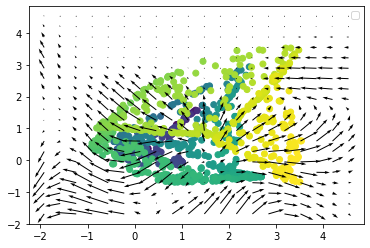

 10%|▉         | 199/2000 [00:17<02:26, 12.27it/s]

EPOCH 200. Loss 19.981243133544922. Flow strength 3.849036455154419. Weight of flow 0.5 Heatmap of P embedding is 


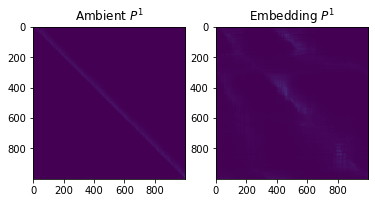

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


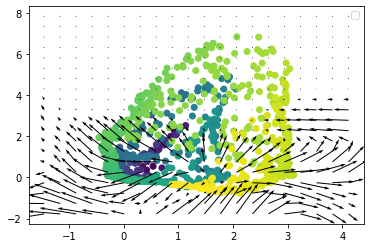

 15%|█▍        | 299/2000 [00:25<02:18, 12.30it/s]

EPOCH 300. Loss 11.429275512695312. Flow strength 3.8073737621307373. Weight of flow 0.5 Heatmap of P embedding is 


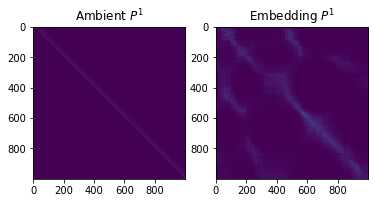

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


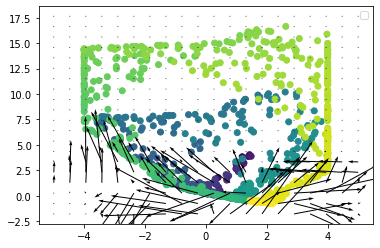

 20%|█▉        | 399/2000 [00:34<02:10, 12.29it/s]

EPOCH 400. Loss 9.592517852783203. Flow strength 3.7846384048461914. Weight of flow 0.5 Heatmap of P embedding is 


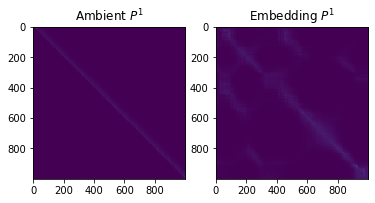

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


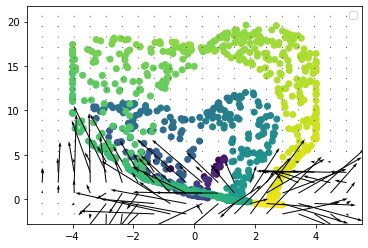

 25%|██▍       | 499/2000 [00:43<02:02, 12.24it/s]

EPOCH 500. Loss 7.464548110961914. Flow strength 3.7648110389709473. Weight of flow 0.5 Heatmap of P embedding is 


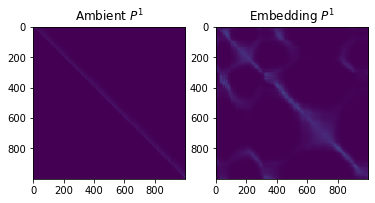

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


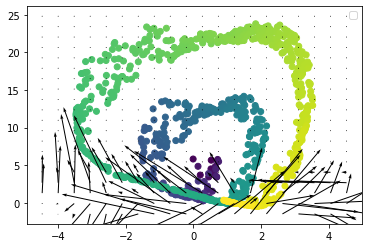

 30%|██▉       | 599/2000 [00:52<01:54, 12.22it/s]

EPOCH 600. Loss 7.240009307861328. Flow strength 3.7551522254943848. Weight of flow 0.5 Heatmap of P embedding is 


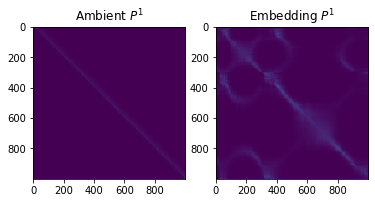

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


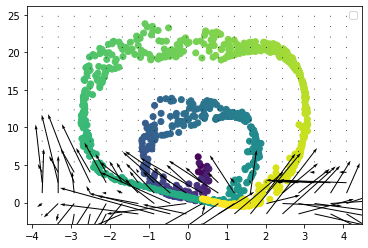

 35%|███▍      | 699/2000 [01:00<01:45, 12.31it/s]

EPOCH 700. Loss 7.15398645401001. Flow strength 3.7437210083007812. Weight of flow 0.5 Heatmap of P embedding is 


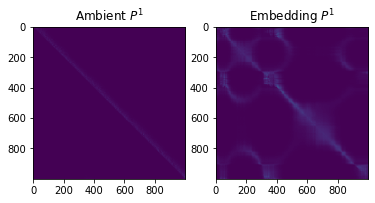

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


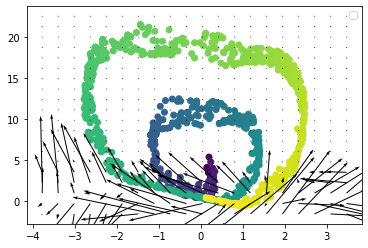

 40%|███▉      | 799/2000 [01:09<01:38, 12.16it/s]

EPOCH 800. Loss 7.187246799468994. Flow strength 3.7273519039154053. Weight of flow 0.5 Heatmap of P embedding is 


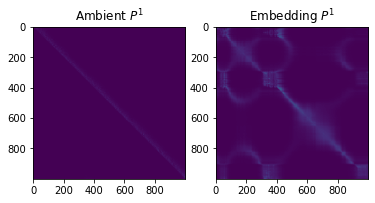

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


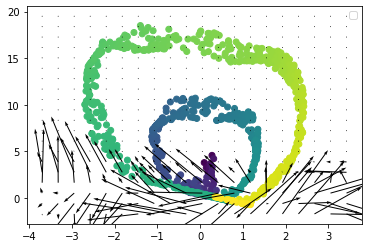

 45%|████▍     | 899/2000 [01:18<01:30, 12.12it/s]

EPOCH 900. Loss 7.3615403175354. Flow strength 3.70210862159729. Weight of flow 0.5 Heatmap of P embedding is 


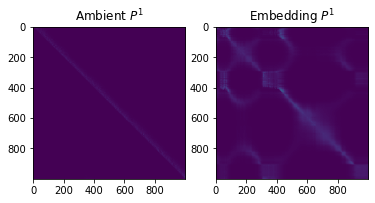

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


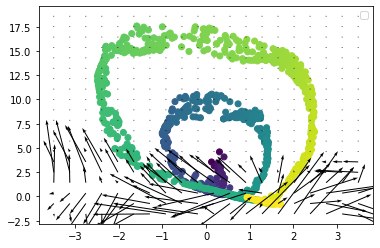

 50%|████▉     | 999/2000 [01:26<01:21, 12.29it/s]

EPOCH 1000. Loss 7.681712627410889. Flow strength 3.6741786003112793. Weight of flow 0.5 Heatmap of P embedding is 


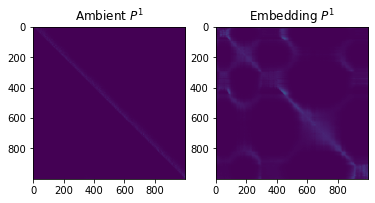

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


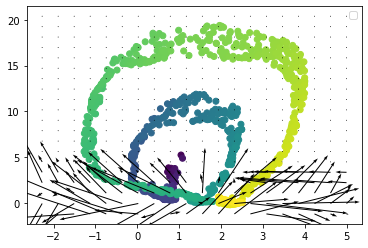

 55%|█████▍    | 1099/2000 [01:35<01:37,  9.26it/s]

EPOCH 1100. Loss 7.581117630004883. Flow strength 3.655176877975464. Weight of flow 0.5 Heatmap of P embedding is 


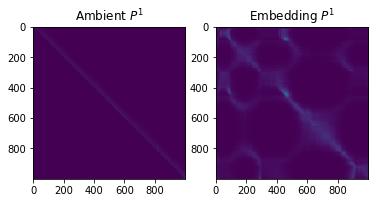

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


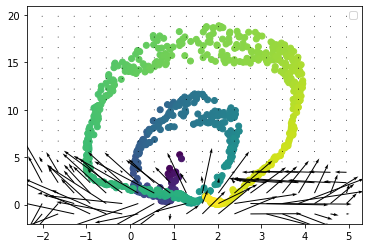

 60%|█████▉    | 1199/2000 [01:45<01:05, 12.21it/s]

EPOCH 1200. Loss 7.434444427490234. Flow strength 3.642212390899658. Weight of flow 0.5 Heatmap of P embedding is 


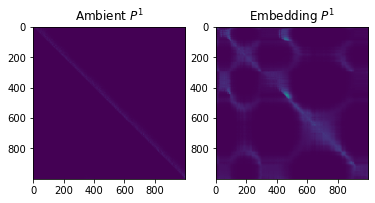

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


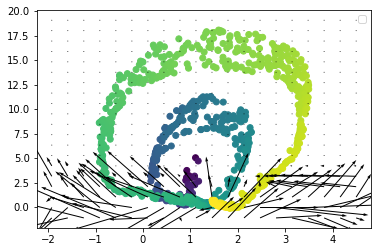

 65%|██████▌   | 1300/2000 [01:54<00:57, 12.20it/s]

EPOCH 1300. Loss 7.346771240234375. Flow strength 3.637272357940674. Weight of flow 0.5 Heatmap of P embedding is 


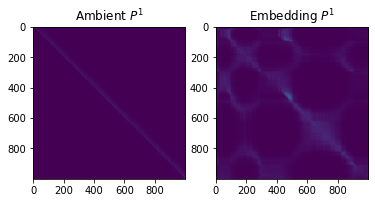

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


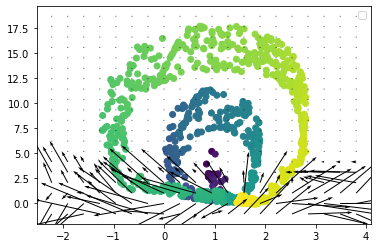

 70%|███████   | 1400/2000 [02:03<00:48, 12.31it/s]

EPOCH 1400. Loss 7.110532760620117. Flow strength 3.6504945755004883. Weight of flow 0.5 Heatmap of P embedding is 


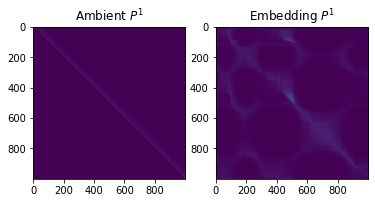

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


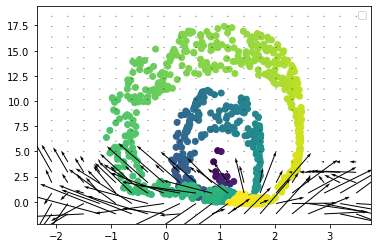

 75%|███████▌  | 1500/2000 [02:11<00:42, 11.81it/s]

EPOCH 1500. Loss 7.159949779510498. Flow strength 3.6721832752227783. Weight of flow 0.5 Heatmap of P embedding is 


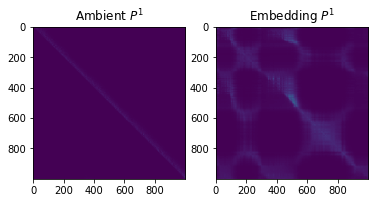

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


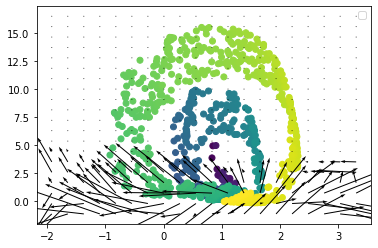

 80%|████████  | 1600/2000 [02:20<00:32, 12.30it/s]

EPOCH 1600. Loss 6.986775875091553. Flow strength 3.69026517868042. Weight of flow 0.5 Heatmap of P embedding is 


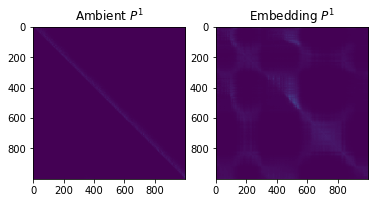

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


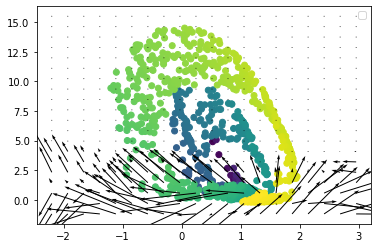

 85%|████████▌ | 1700/2000 [02:29<00:24, 12.22it/s]

EPOCH 1700. Loss 6.676448345184326. Flow strength 3.698331832885742. Weight of flow 0.5 Heatmap of P embedding is 


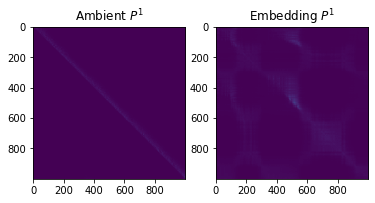

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


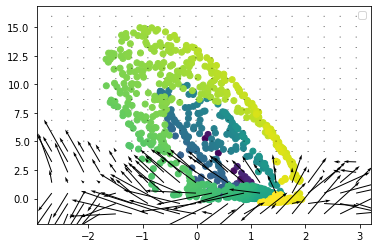

 90%|█████████ | 1800/2000 [02:38<00:32,  6.12it/s]

EPOCH 1800. Loss 6.202492713928223. Flow strength 3.7017273902893066. Weight of flow 0.5 Heatmap of P embedding is 


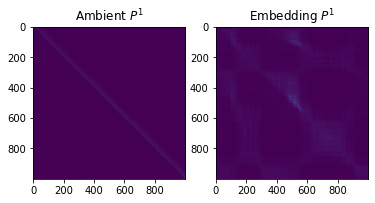

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


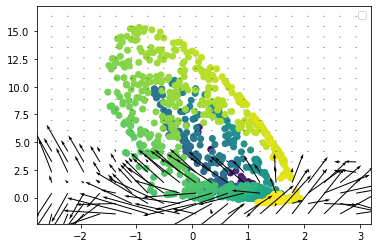

 94%|█████████▎| 1874/2000 [02:46<00:10, 12.26it/s]

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=2,sigma_embedding=2,flow_strength_graph=4, flow_strength_embedding=4, device=device, learning_rate = 1e-3,
                           smoothness=0, labels=labels)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

In [7]:
A = torch.rand(10,2)

In [8]:
A[:,0]a

SyntaxError: invalid syntax (4173016672.py, line 1)

In [ ]:
A[:,0][A[:,0] > 0.5] = A[:,0][A[:,0] > 0.5]

In [ ]:
A[:,0]